In [ ]:
# I will be making a BayesNet that takes in a vector of features, sums up the vector,
# and then outputs a vector of probabilities.

# First - Finish the data
# Second - import data and extract features (can be preliminary)
# Third - Sum up features and calculate probabilities
# Fourth - Output probabilities for a given word (context)
# Fifth - Turn probabilities into a pronunciation by checking against the given ON/KUN pronunciations
# Lastly - Output and format the data beautifully (create into a blackbox)

#### PLEASE NOTE - ALLKANJI NOW CONTAINS SINGLE CHARACTER WORDS AS WELL ####

In [1]:
import re
import pickle
import csv
import pandas as pd
import romkan
from collections import Counter

In [2]:
kanjis = pd.read_csv('../data/kanjidic2.csv')
propernouns = pd.read_csv('../data/propernouns_subset.csv')
boys = pd.read_csv('../data/Top10BoyNames.csv')
girls = pd.read_csv('../data/Top10GirlNames.csv')
surnames = pd.read_csv('../data/PopularSurnames.csv')
vocab = pd.read_csv('../data/created/JMdict_e.csv', sep='\t')

In [43]:
kanji_pronunciations = pickle.load(open('kanji.p','rb')) # This is the dictionary that contains all of the pronunciations for the kanji

In [4]:
#remove all entries with Roman characters and numbers in the name
propernouns = propernouns[propernouns.kanji.map(lambda x: True if re.match('[０-９]+|[ａ-ｚＡ-Ｚ]+|ゝ|〆', x) == None else False)]
#propernouns['frequency'] = 1
#del propernouns.index
#propernouns.columns = 

In [5]:
propernouns.head()

,index,kanji,pronunciation,type,meaning
0,0,国労,こくろう,organization name,National Railway Workers' Union
86,86,ああ無情,ああむじょう,"work of art, literature, music, etc. name",Les Miserables (novel by Victor Hugo)
87,87,あいおい損害保険,あいおいそんがいほけん,company name,Aioi Insurance
88,88,あいか瞬,あいかしゅん,female given name or forename,Aika Shun (1984.12.8-)
89,89,あいがわゴルフ場,あいがわゴルフじょう,place name,Aigawa golf links


In [62]:
#change column names
surnames.columns = ['rank','name','pronunciation','frequency']
#change pronunciation to hiragana
surnames['pronunciation'] = surnames['pronunciation'].map(lambda x: romkan.to_hiragana(re.sub('Ō|ō', 'ou', x)))
#convert string to number for frequency
surnames['frequency'] = surnames['frequency'].map(lambda x: int(x.replace(',','')))
surnames['pronunciation'] = surnames['pronunciation'].map(lambda x: x.split()[0])
#surnames['type'] = 'Surname'
#surnames['meaning'] = 'Surname'
surnames.head()

,rank,name,pronunciation,frequency
0,1,佐藤,さとう,1990000
1,2,鈴木,すずき,1900000
2,3,高橋,たかはし,1470000
3,4,田中,たなか,1340000
4,5,渡辺,わたなべ,1200000


In [7]:
boys.columns = ['rank', 'name', 'pronunciation', 'frequency']
boys['rank'] = boys['rank'].map(lambda x: re.search('[1-9]+', x).group())
boys['frequency'] = boys['frequency'].map(lambda x: re.search('[1-9]+', x).group())
boys['pronunciation'] = boys['pronunciation'].map(lambda x: romkan.to_hiragana(romkan.to_roma(x)))
#boys['meaning'] = 'Boys name'
# do the same with boys
boys.head()

,rank,name,pronunciation,frequency
0,1,大翔,ひろと,36
1,1,大翔,やまと,5
2,1,大翔,はると,4
3,1,大翔,まさと,3
4,1,大翔,たいが,2


In [8]:
girls.head()

,順位,名前,読み方,人数
0,第1位,葵,アオイ,61人
1,第1位,葵,メイ,1人
2,第2位,さくら,サクラ,58人
3,第3位,陽菜,ヒナ,39人
4,第3位,陽菜,ハルナ,5人


In [9]:
girls.columns = ['rank', 'name', 'pronunciation', 'frequency']
girls['rank'] = girls['rank'].map(lambda x: re.search('[1-9]+', x).group())
girls['frequency'] = girls['frequency'].map(lambda x: re.search('[1-9]+', x).group())
girls['pronunciation'] = girls['pronunciation'].map(lambda x: romkan.to_hiragana(romkan.to_roma(x)))
#girls['meaning'] = 'Girls name'

girls.head()

,rank,name,pronunciation,frequency
0,1,葵,あおい,61
1,1,葵,めい,1
2,2,さくら,さくら,58
3,3,陽菜,ひな,39
4,3,陽菜,はるな,5


In [10]:
#surnames['Pronunciation'] = ''

In [11]:
counter_string = ''
for entry in propernouns[propernouns['type'] == 'company name'].iterrows():
    counter_string += entry[1][1]
company_counter = Counter(counter_string)
counter_string = ''
for entry in propernouns[propernouns['type'] == 'family or surname'].iterrows():
    counter_string += entry[1][1]
surname_counter = Counter(counter_string)
counter_string = ''
for entry in propernouns[propernouns['type'] == 'female given name or forename'].iterrows():
    counter_string += entry[1][1]
female_name_counter = Counter(counter_string)
counter_string = ''
for entry in propernouns[propernouns['type'] == 'male given name or forename'].iterrows():
    counter_string += entry[1][1]
male_name_counter = Counter(counter_string)
counter_string = ''
for entry in propernouns[propernouns['type'] == 'place name'].iterrows():
    counter_string += entry[1][1]
place_name_counter = Counter(counter_string)
counter_string = ''
for entry in propernouns[propernouns['type'] == 'given name or forename, gender not specified'].iterrows():
    counter_string += entry[1][1]
unisex_name_counter = Counter(counter_string)
counter_string = ''
for entry in surnames.iterrows():
    counter_string += entry[1][1]
popular_surname_counter = Counter(counter_string)
counter_string = ''
for entry in boys.iterrows():
    counter_string += entry[1][1]
boy_counter = Counter(counter_string)
counter_string = ''
for entry in girls.iterrows():
    counter_string += entry[1][1]
girl_counter = Counter(counter_string)

#graph popular_surname_counter and surname_counter

In [ ]:
# collect pairs of synonyms and try to get pronunciation from them... does it work?

In [58]:
boys

,rank,name,pronunciation,frequency
0,1,大翔,ひろと,36
1,1,大翔,やまと,5
2,1,大翔,はると,4
3,1,大翔,まさと,3
4,1,大翔,たいが,2
5,1,大翔,つばさ,2
6,1,大翔,たいし,1
7,1,大翔,だいと,1
8,2,蓮,れん,52
9,3,悠真,ゆうま,39


In [57]:
print(boy_counter)
#print(girl_counter)

Counter({'翔': 13, '陽': 9, '大': 8, '悠': 7, '真': 3, '湊': 3, '太': 3, '新': 2, '樹': 2, '朝': 1, '蓮': 1, '葵': 1})


In [55]:
print(male_name_counter)

Counter({'郎': 2530, '朗': 1278, '之': 897, '一': 634, '三': 461, '太': 431, '彦': 425, '二': 294, '助': 213, '次': 213, '市': 207, '左': 199, '多': 195, '久': 190, '壱': 183, '介': 176, '佐': 167, '喜': 167, '砂': 161, '義': 154, '司': 139, '治': 136, '吉': 131, '五': 124, '輔': 123, '光': 120, '四': 120, '敬': 114, '孝': 110, '祐': 105, '佑': 101, '幸': 98, '丞': 98, '宏': 96, '志': 96, '元': 96, '公': 95, '佳': 95, '赦': 95, '弘': 93, '健': 93, '浩': 91, '栄': 89, '嘉': 89, '康': 85, '貴': 84, '英': 84, '紀': 83, '晃': 80, '八': 79, '啓': 79, '恒': 74, '雅': 73, '慶': 71, '恭': 70, '賢': 70, '衛': 69, '金': 67, '好': 66, '京': 66, '吾': 66, '憲': 65, '良': 64, '寛': 64, '教': 61, '源': 61, '功': 60, '欣': 56, '亮': 54, '伊': 54, '厳': 52, '恵': 52, '永': 51, '史': 50, '甫': 49, '季': 49, '錦': 49, '欽': 47, '俊': 47, '玄': 46, '伍': 46, '敏': 46, '兼': 46, '謹': 45, '宇': 45, '愛': 45, '郷': 45, '幹': 44, '享': 44, '琴': 44, '弦': 44, '建': 44, '門': 43, '輝': 43, '均': 43, '斤': 41, '鏡': 41, '鋭': 41, '巾': 41, '映': 40, '謙': 39, '瑛': 39, '影': 39, '広': 39, '利': 38, '詠': 38, '厚':

In [54]:
print(female_name_counter)

# also look at position of kanji (first/last kanji) and hiragana pronunciation



Counter({'子': 6070, '亜': 2251, '愛': 2027, '美': 1966, '安': 1332, '恵': 1219, '実': 1153, '阿': 1128, '花': 1005, '佳': 964, '里': 916, '衣': 886, '奈': 865, '江': 851, '華': 836, '希': 812, '香': 803, '海': 747, '代': 743, '絵': 742, '夏': 739, '久': 648, '加': 644, '音': 641, '乃': 637, '結': 580, '菜': 559, '世': 526, '依': 525, '光': 522, '梨': 516, '枝': 509, '羽': 494, '伊': 487, '紀': 470, '理': 466, '杏': 436, '幸': 428, '一': 423, '貴': 416, '津': 409, '沙': 405, '果': 392, '月': 392, '莉': 389, '英': 366, '利': 359, '季': 357, '喜': 353, '以': 352, '芽': 350, '都': 349, '見': 345, '紗': 332, '那': 327, '輝': 317, '未': 316, '歌': 310, '空': 282, '可': 280, '映': 279, '玖': 275, '弥': 266, '栄': 263, '永': 258, 'あ': 255, '慧': 250, '葉': 248, 'み': 235, '佐': 234, '寿': 231, '生': 231, '意': 230, '維': 225, '穂': 225, '名': 223, '惟': 222, '巳': 222, '雅': 220, '野': 219, '嘉': 213, '郁': 212, '央': 212, '綾': 205, '咲': 201, '湖': 201, '伽': 195, '宇': 192, '葵': 184, '夢': 181, '姫': 176, '由': 175, 'さ': 174, '南': 172, '瑛': 172, '樹': 168, '砂': 168, '々': 165, '早

In [33]:
# I need to combine propernouns, boys, girls, and surnames
#clean and convert katakana to hiragana for boys and girls

# i should get a table of globals... this means the percentage of next pronunciation given current pronunciation
# 1764 combinations

In [ ]:
# number of on/kun/nanori

# which pronunciations are used the most in which... proper nouns are probably mostly nanori, etc.

# consistency effects (moped (noun) vs moped (verb))

# most common kanji used in names (per type) vs most common kanji used in vocab

In [12]:
propernouns.head()

,index,kanji,pronunciation,type,meaning
0,0,国労,こくろう,organization name,National Railway Workers' Union
86,86,ああ無情,ああむじょう,"work of art, literature, music, etc. name",Les Miserables (novel by Victor Hugo)
87,87,あいおい損害保険,あいおいそんがいほけん,company name,Aioi Insurance
88,88,あいか瞬,あいかしゅん,female given name or forename,Aika Shun (1984.12.8-)
89,89,あいがわゴルフ場,あいがわゴルフじょう,place name,Aigawa golf links


In [13]:
kanjis.head()

,Unnamed: 0,character,freq,meaning,on,kun,nanori
0,0,亜,1509.0,"['Asia', 'rank next', 'come after', '-ous']",['ア'],['つ.ぐ'],"['や', 'つぎ', 'つぐ']"
1,1,唖,NaN,"['mute', 'dumb']","['ア', 'アク']",['おし'],[]
2,2,娃,NaN,['beautiful'],"['ア', 'アイ', 'ワ']",['うつく.しい'],['い']
3,3,阿,1126.0,"['Africa', 'flatter', 'fawn upon', 'corner', '...","['ア', 'オ']","['おもね.る', 'くま']","['ほとり', 'あず', 'あわ', 'おか', 'きた', 'な']"
4,4,哀,1715.0,"['pathetic', 'grief', 'sorrow', 'pathos', 'pit...",['アイ'],"['あわ.れ', 'あわ.れむ', 'かな.しい']",[]


In [12]:
#vocab.pronunciation = vocab.pronunciation.map(lambda x: romkan.to_hiragana(romkan.to_roma(x)))
del kanjis['Unnamed: 0']
#del propernouns['Unnamed: 0']
kanjis.on = kanjis.on.map(lambda x: re.findall("""[\u3040-\u309f]+""", romkan.to_hiragana(romkan.to_roma(x))))
##############################
#kanji.kun = kanji.kun.map(lambda x: list(set(map(lambda y: y.split('.')[0],re.findall("""[\u3040-\u309f.]+""", x))))) # THIS THREW AWAY GOOD INFO
##############################
kanjis['kun1'] = kanjis.kun.map(lambda x: list(set(map(lambda y: y.split('.')[0],re.findall("""[\u3040-\u309f.]+""", x)))))
kanjis['kun2'] = kanjis.kun.map(lambda x: list(set(map(lambda y: ''.join(y.split('.')),re.findall("""[\u3040-\u309f.]+""", x)))))
kanjis['kuns'] = kanjis.kun1 + kanjis.kun2
# I should also include the kun without splitting somehow... aka shi.ku = shi and shiku
kanjis.nanori = kanjis.nanori.map(lambda x: re.findall("""[\u3040-\u309f]+""", x))
kanjis.meaning = kanjis.meaning.map(lambda x: re.findall("""[a-zA-Z-]+ *[a-zA-Z-]+""", x))
#char_ser = pd.Series(kanji.on.values,index=kanji.character).to_dict()
kanjis['prons'] = kanjis.kun1 + kanjis.kun2 + kanjis.on + kanjis.nanori
#kanji.onkun.map(lambda x: list(set(x))) ########## NOW MAKE SURE ALL ARE SET TO LISTS SO THERE ARE NO DUPLICATES
char_ser = pd.Series(kanjis.prons.values,index=kanjis.character).to_dict()
ons = pd.Series(kanjis.on.values,index=kanjis.character).to_dict()
kuns = pd.Series(kanjis.kuns.values,index=kanjis.character).to_dict()
nanori = pd.Series(kanjis.nanori.values,index=kanjis.character).to_dict()

In [13]:
char_ser = pd.Series(kanjis.prons.values,index=kanjis.character).to_dict()
ons = pd.Series(kanjis.on.values,index=kanjis.character).to_dict()
kuns = pd.Series(kanjis.kuns.values,index=kanjis.character).to_dict()
nanori = pd.Series(kanjis.nanori.values,index=kanjis.character).to_dict()

In [104]:
kanjis

,character,freq,meaning,on,kun,nanori,kun1,kun2,kuns,prons
0,亜,1509.0,"[Asia, rank next, come after, -ous]",[あ],['つ.ぐ'],"[や, つぎ, つぐ]",[つ],[つぐ],"[つ, つぐ]","[つ, つぐ, あ, や, つぎ, つぐ]"
1,唖,NaN,"[mute, dumb]","[あ, あく]",['おし'],[],[おし],[おし],"[おし, おし]","[おし, おし, あ, あく]"
2,娃,NaN,[beautiful],"[あ, あい, わ]",['うつく.しい'],[い],[うつく],[うつくしい],"[うつく, うつくしい]","[うつく, うつくしい, あ, あい, わ, い]"
3,阿,1126.0,"[Africa, flatter, fawn upon, corner, nook, rec...","[あ, お]","['おもね.る', 'くま']","[ほとり, あず, あわ, おか, きた, な]","[くま, おもね]","[おもねる, くま]","[くま, おもね, おもねる, くま]","[くま, おもね, おもねる, くま, あ, お, ほとり, あず, あわ, おか, きた, な]"
4,哀,1715.0,"[pathetic, grief, sorrow, pathos, pity, sympat...",[あい],"['あわ.れ', 'あわ.れむ', 'かな.しい']",[],"[かな, あわ]","[あわれむ, かなしい, あわれ]","[かな, あわ, あわれむ, かなしい, あわれ]","[かな, あわ, あわれむ, かなしい, あわれ, あい]"
5,愛,640.0,"[love, affection, favourite]",[あい],"['いと.しい', 'かな.しい', 'め.でる', 'お.しむ', 'まな']","[あ, あし, え, かな, なる, めぐ, めぐみ, よし, ちか]","[め, お, まな, かな, いと]","[めでる, おしむ, いとしい, まな, かなしい]","[め, お, まな, かな, いと, めでる, おしむ, いとしい, まな, かなしい]","[め, お, まな, かな, いと, めでる, おしむ, いとしい, まな, かなしい, あ..."
6,挨,2258.0,"[approach, draw near, push open]",[あい],['ひら.く'],[],[ひら],[ひらく],"[ひら, ひらく]","[ひら, ひらく, あい]"
7,姶,NaN,"[good-looking, quiet]","[おう, あい]",['あい'],[],[あい],[あい],"[あい, あい]","[あい, あい, おう, あい]"
8,逢,2116.0,"[meeting, tryst, date, rendezvous]",[ほう],"['あ.う', 'むか.える']","[あい, おう]","[むか, あ]","[むかえる, あう]","[むか, あ, むかえる, あう]","[むか, あ, むかえる, あう, ほう, あい, おう]"
9,葵,2122.0,[hollyhock],[き],['あおい'],"[まもる, け]",[あおい],[あおい],"[あおい, あおい]","[あおい, あおい, き, まもる, け]"


In [147]:
names.groupby('type').count()
propernouns.columns = ['index','name','pronunciation','type','meaning']

#names.head()
# remove all rows where the kanji column contains [#, 〆, ゝ, no kanji]

,kanji,pronunciation,meaning
type,,,
company name,121,121,121
family or surname,35178,35178,35178
female given name or forename,32203,32203,32203
full name of a particular person,12580,12580,12580
"given name or forename, gender not specified",17460,17460,17460
male given name or forename,7477,7477,7477
organization name,570,570,570
place name,63178,63178,63178
product name,28,28,28


In [63]:
surnames.pronunciation.values

array(['さとう', 'すずき', 'たかはし', 'たなか', 'わたなべ', 'いとう', 'なかむら', 'こばやし', 'やまもと',
       'かとう', 'よしだ', 'やまだ', 'ささき', 'やまぐち', 'まつもと', 'いのうえ', 'きむら', 'しみず',
       'はやし', 'さいとう', 'さいとう', 'やまざき', 'なかじま', 'もり', 'あべ', 'いけだ', 'はしもと',
       'いしかわ', 'やました', 'おがわ', 'いしい', 'はせがわ', 'ごとう', 'おかだ', 'こんどう', 'まえだ',
       'ふじた', 'えんどう', 'あおき', 'さかもと', 'むらかみ', 'おうた', 'かねこ', 'ふじい', 'ふくだ',
       'にしむら', 'みうら', 'たけうち', 'なかがわ', 'おかもと', 'まつだ', 'はらだ', 'なかの', 'おの',
       'たむら', 'ふじわら', 'なかやま', 'いしだ', 'こじま', 'わだ', 'もりた', 'うちだ', 'しばた',
       'さかい', 'はら', 'たかぎ', 'よこやま', 'あんどう', 'みやざき', 'うえだ', 'しまだ', 'くどう',
       'おうの', 'みやもと', 'すぎやま', 'いまい', 'まるやま', 'ますだ', 'たかだ', 'むらた', 'ひらの',
       'おうつか', 'すがわら', 'たけだ', 'あらい', 'こやま', 'のぐち', 'さくらい', 'ちば', 'いわさき',
       'さの', 'たにぐち', 'うえの', 'まつい', 'こうの', 'いちかわ', 'わたなべ', 'のむら', 'きくち',
       'きのした'], dtype=object)

In [67]:
def PronunciationTypeCounter(dataframe):
    name_kanji = dataframe.name.values
    name_prons = dataframe.pronunciation.values
    on_count = 0
    kun_count = 0
    na_count = 0
    modified_count = 0
    not_found_count = 0
    for i in range(len(name_prons)):
        for kanji in name_kanji[i]:
            done = False
            for pron in ons.get(kanji, ['not found']):
                if pron == 'not found':
                    done = True
                elif pron in name_prons[i]:
                    done = True
                    on_count = on_count + 1
            if not done:
                for pron in kuns.get(kanji, []):
                    if pron in name_prons[i]:
                        done = True
                        kun_count = kun_count + 1
            if not done:
                for pron in nanori.get(kanji, []):
                    if pron in name_prons[i]:
                        done = True
                        na_count = na_count + 1
            if not done:
                for pron in kanji_pronunciations.get(kanji, set()):
                    if pron in name_prons[i]:
                        done = True
                        modified_count += 1
            if not done:
                not_found_count = not_found_count + 1
#        name_prons[i]
#    for pron in name_prons:
#        i = 0
#        for k in name_kanji:
#            done = False
#            for p in ons.get(k, ['not found']):
#                if p == 'not found':
#                    done = True
#                elif p in pron:
#                    done = True
#                    on_count = on_count + 1
#            if not done:
#                for p in kuns.get(k, []):
#                    if p in pron:
#                        done = True
#                        kun_count = kun_count + 1
#            if not done:
#                for p in nanori.get(k, []):
#                    if p in pron:
#                        done = True
#                        na_count = na_count + 1
#            if not done:
#                print(pron, k, kanji_pronunciations.get(k, set()))
#                if p in kanji_pronunciations.get(k, set()):
#                    done = True
#                    modified_count += 1
#            if not done:
#                not_found_count = not_found_count + 1

    total_count = on_count + kun_count + na_count + not_found_count + modified_count
    print('Onyomi count:', on_count, on_count/total_count)
    print('Kunyomi count:', kun_count, kun_count/total_count)
    print('Nanori count:', na_count, na_count/total_count)
    print('Modified count:', modified_count, modified_count/total_count)
    print('Irregular count:', not_found_count, not_found_count/total_count)
    print('Total count:', total_count)

In [54]:
print(surnames.to_string())

    rank name pronunciation  frequency
0      1   佐藤           さとう    1990000
1      2   鈴木           すずき    1900000
2      3   高橋          たかはし    1470000
3      4   田中           たなか    1340000
4      5   渡辺          わたなべ    1200000
5      6   伊藤           いとう    1150000
6      7   中村          なかむら    1080000
7      8   小林          こばやし    1060000
8      9   山本          やまもと    1020000
9     10   加藤           かとう     920000
10    11   吉田           よしだ     850000
11    12   山田           やまだ     820000
12    13  佐々木           ささき     710000
13    14   山口          やまぐち     640000
14    15   松本          まつもと     630000
15    16   井上          いのうえ     600000
16    17   木村           きむら     580000
17    18   清水           しみず     560000
18    19    林           はやし     550000
19    20   斉藤          さいとう     530000
20    21   斎藤          さいとう     520000
21    22   山崎    やまざき\nやまさき     490000
22    23   中島    なかじま\nなかしま     480000
23    24    森            もり     470000
24    25   阿部            

In [68]:
PronunciationTypeCounter(surnames)

Onyomi count: 32 0.09523809523809523
Kunyomi count: 264 0.7857142857142857
Nanori count: 19 0.05654761904761905
Modified count: 21 0.0625
Irregular count: 0 0.0
Total count: 336


In [69]:
PronunciationTypeCounter(boys)

Onyomi count: 14 0.208955223880597
Kunyomi count: 36 0.5373134328358209
Nanori count: 5 0.07462686567164178
Modified count: 0 0.0
Irregular count: 12 0.1791044776119403
Total count: 67


In [72]:
vocab.columns = ['name','pronunciation','pos','meaning']
PronunciationTypeCounter(vocab.sample(1000))

Onyomi count: 2041 0.617362371445856
Kunyomi count: 1095 0.3312159709618875
Nanori count: 43 0.013006654567453115
Modified count: 37 0.01119177253478524
Irregular count: 90 0.02722323049001815
Total count: 3306


In [70]:
PronunciationTypeCounter(girls)

Onyomi count: 3 0.05172413793103448
Kunyomi count: 43 0.7413793103448276
Nanori count: 5 0.08620689655172414
Modified count: 0 0.0
Irregular count: 7 0.1206896551724138
Total count: 58


In [21]:
propernouns.columns = ['index','name','pronunciation','type','meaning']

In [71]:
PronunciationTypeCounter(propernouns.sample(1000))
# the irregular count is abnormally high because of poor Kanji data for Nanori
#propernouns.columns = ['index','name','pronunciation','type','meaning']


Onyomi count: 1119 0.30448979591836733
Kunyomi count: 1928 0.5246258503401361
Nanori count: 404 0.10993197278911565
Modified count: 134 0.0364625850340136
Irregular count: 90 0.024489795918367346
Total count: 3675


In [76]:
char_ser['国'] #'国労'

['くに', 'くに', 'こく', 'くな', 'こ']

In [ ]:
# find percentage of on, kun, and nanori used in each category
# find percentage of regular and percentage of unregular for each category
# look at words that contribute to the not_found_count and see if they are DQN
#     (maybe meaning contributes to pronunciation)

In [149]:
#kanji[kanji.character == '〆']
#kanji.head()
kanjis[kanjis.character == '亜']

,Unnamed: 0,character,freq,meaning,on,kun,nanori
0,0,亜,1509.0,"['Asia', 'rank next', 'come after', '-ous']",['ア'],['つ.ぐ'],"['や', 'つぎ', 'つぐ']"


In [74]:
true_dict = pickle.load(open('true.p','rb')) # This is the dictionary that contains all of the regular propernouns

In [75]:
########## FULL PRONUNCIATIONS ###########

## TODO: Also get length of vocabulary word (single character words probably use KUNYOMI/follow a pattern, etc)

### all dictionaries except for globals start with curKanji...

### This means that all dictionaries are [curKanji][arg1][arg2] = counter (or error if not in dictionary)
### Essentially backwards
#def init():
currentPronunciation = dict() # 

previousPronunciationCurrentPronunciation = dict() # prev, curPron -- (V) curPron, prev
nextPronunciationCurrentPronunciation = dict() # 
previousCharacterCurrentPronunciation = dict() # 
nextCharacterCurrentPronunciation = dict() # 
allKanjiCurrentPronunciation = dict() # 

# Features given pronunciation
currentPronunciationPreviousPronunciation = dict() #
currentPronunciationNextPronunciation = dict() # 
currentPronunciationPreviousCharacter = dict() # 
currentPronunciationNextCharacter = dict() # 
currentPronunciationAllKanji = dict() # 

currentKanjiPreviousPronunciation = dict() #
currentKanjiNextPronunciation = dict() # 
currentKanjiPreviousCharacter = dict() # 
currentKanjiNextCharacter = dict() # 
currentKanjiAllKanji = dict() # 
currentKanjiOneChar = dict()

# New for totals... ###
globalPreviousPronunciation = dict() ### -> dict() -> [prevPron][curPron]
globalPreviousCharacter = dict() ### -> [prevChar][curPron]
globalNextPronunciation = dict() ### -> [nextPron][curPron]
globalNextCharacter = dict() ### -> [nextChar][curPron]
##GLOBALGLOBALS
allKanjiCurrentPronunciation = dict() # [curPron]
allKanjiCurrentPronunciationPreviousPronunciation = dict() # [curPron][prevPron]
allKanjiCurrentPronunciationNextPronunciation = dict()
allKanjiCurrentPronunciationPreviousCharacter = dict()
allKanjiCurrentPronunciationNextCharacter = dict()
allKanjiCurrentPronunciationAllKanji = dict()

###
# number of characters in word
# 

def updateAllKanji(curKanji, curPron, allKanji):
    global allKanjiCurrentPronunciation, currentPronunciationAllKanji, currentKanjiAllKanji
    currentKanjiAllKanji[curKanji] = currentKanjiAllKanji.get(curKanji, dict())
    currentKanjiAllKanji[curKanji][allKanji] = currentKanjiAllKanji[curKanji].get(allKanji, 0) + 1
    currentPronunciationAllKanji[curKanji] = currentPronunciationAllKanji.get(curKanji, dict())
    currentPronunciationAllKanji[curKanji][curPron] = currentPronunciationAllKanji[curKanji].get(curPron, {True:0,False:0})
    currentPronunciationAllKanji[curKanji][curPron][allKanji] = currentPronunciationAllKanji[curKanji][curPron][allKanji] + 1
    allKanjiCurrentPronunciation[curKanji] = allKanjiCurrentPronunciation.get(curKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji] = allKanjiCurrentPronunciation[curKanji].get(allKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji][curPron] = allKanjiCurrentPronunciation[curKanji][allKanji].get(curPron,0) + 1
    
def updateCurPron(curKanji, curPron, oneChar):
    global currentPronunciation, v_cur_pron
    currentPronunciation[curKanji] = currentPronunciation.get(curKanji, dict())
    currentPronunciation[curKanji][curPron] = currentPronunciation[curKanji].get(curPron, 0) + 1
    currentKanjiOneChar[curKanji] = currentKanjiOneChar.get(curKanji, dict())
    currentKanjiOneChar[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())
    currentKanjiOneChar[curKanji][oneChar][curPron] = currentKanjiOneChar[curKanji][oneChar].get(curPron, 0) + 1
    

def updatePrevPron(curKanji, prevPron, curPron):
    global previousPronunciationCurrentPronunciation, currentPronunciationPreviousPronunciation, globalPreviousPronunciation, currentKanjiPreviousPronunciation
    currentKanjiPreviousPronunciation[curKanji] = currentKanjiPreviousPronunciation.get(curKanji, dict())
    currentKanjiPreviousPronunciation[curKanji][prevPron] = currentKanjiPreviousPronunciation[curKanji].get(prevPron, 0) + 1
    previousPronunciationCurrentPronunciation[curKanji] = previousPronunciationCurrentPronunciation.get(curKanji, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron] = previousPronunciationCurrentPronunciation[curKanji].get(prevPron, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron][curPron] = previousPronunciationCurrentPronunciation[curKanji][prevPron].get(curPron,0) + 1
    currentPronunciationPreviousPronunciation[curKanji] = currentPronunciationPreviousPronunciation.get(curKanji, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron] = currentPronunciationPreviousPronunciation[curKanji].get(curPron, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron][prevPron] = currentPronunciationPreviousPronunciation[curKanji][curPron].get(prevPron,0) + 1
    globalPreviousPronunciation[prevPron] = globalPreviousPronunciation.get(prevPron, dict())
    globalPreviousPronunciation[prevPron][curPron] = globalPreviousPronunciation[prevPron].get(curPron, 0) + 1
    
def updatePrevChar(curKanji, prevChar, curPron):
    global previousCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalPreviousCharacter, currentKanjiPreviousCharacter
    currentKanjiPreviousCharacter[curKanji] = currentKanjiPreviousCharacter.get(curKanji, dict())
    currentKanjiPreviousCharacter[curKanji][prevChar] = currentKanjiPreviousCharacter[curKanji].get(prevChar, 0) + 1
    previousCharacterCurrentPronunciation[curKanji] = previousCharacterCurrentPronunciation.get(curKanji, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar] = previousCharacterCurrentPronunciation[curKanji].get(prevChar, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar][curPron] = previousCharacterCurrentPronunciation[curKanji][prevChar].get(curPron,0) + 1
    currentPronunciationPreviousCharacter[curKanji] = currentPronunciationPreviousCharacter.get(curKanji, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron] = currentPronunciationPreviousCharacter[curKanji].get(curPron, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron][prevChar] = currentPronunciationPreviousCharacter[curKanji][curPron].get(prevChar,0) + 1
    globalPreviousCharacter[prevChar] = globalPreviousCharacter.get(prevChar, dict())
    globalPreviousCharacter[prevChar][curPron] = globalPreviousCharacter[prevChar].get(curPron, 0) + 1
    
def updateNextPron(curKanji, nextPron, curPron):
    global nextPronunciationCurrentPronunciation, currentPronunciationNextPronunciation, globalNextPronunciation, currentKanjiNextPronunciation
    currentKanjiNextPronunciation[curKanji] = currentKanjiNextPronunciation.get(curKanji, dict())
    currentKanjiNextPronunciation[curKanji][nextPron] = currentKanjiNextPronunciation[curKanji].get(nextPron, 0) + 1
    nextPronunciationCurrentPronunciation[curKanji] = nextPronunciationCurrentPronunciation.get(curKanji, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron] = nextPronunciationCurrentPronunciation[curKanji].get(nextPron, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron][curPron] = nextPronunciationCurrentPronunciation[curKanji][nextPron].get(curPron,0) + 1
    currentPronunciationNextPronunciation[curKanji] = currentPronunciationNextPronunciation.get(curKanji, dict())
    currentPronunciationNextPronunciation[curKanji][curPron] = currentPronunciationNextPronunciation[curKanji].get(curPron, dict())
    currentPronunciationNextPronunciation[curKanji][curPron][nextPron] = currentPronunciationNextPronunciation[curKanji][curPron].get(nextPron,0) + 1
    globalNextPronunciation[nextPron] = globalNextPronunciation.get(nextPron, dict())
    globalNextPronunciation[nextPron][curPron] = globalNextPronunciation[nextPron].get(curPron, 0) + 1
    
def updateNextChar(curKanji, nextChar, curPron):
    global nextCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalNextCharacter, currentKanjiNextCharacter
    currentKanjiNextCharacter[curKanji] = currentKanjiNextCharacter.get(curKanji, dict())
    currentKanjiNextCharacter[curKanji][nextChar] = currentKanjiNextCharacter[curKanji].get(nextChar, 0) + 1
    nextCharacterCurrentPronunciation[curKanji] = nextCharacterCurrentPronunciation.get(curKanji, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar] = nextCharacterCurrentPronunciation[curKanji].get(nextChar, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar][curPron] = nextCharacterCurrentPronunciation[curKanji][nextChar].get(curPron,0) + 1
    currentPronunciationNextCharacter[curKanji] = currentPronunciationNextCharacter.get(curKanji, dict())
    currentPronunciationNextCharacter[curKanji][curPron] = currentPronunciationNextCharacter[curKanji].get(curPron, dict())
    currentPronunciationNextCharacter[curKanji][curPron][nextChar] = currentPronunciationNextCharacter[curKanji][curPron].get(nextChar,0) + 1
    globalNextCharacter[nextChar] = globalNextCharacter.get(nextChar, dict())
    globalNextCharacter[nextChar][curPron] = globalNextCharacter[nextChar].get(curPron, 0) + 1

In [76]:
########## PARTIAL PRONUNCIATIONS ###########

## TODO: Also get length of vocabulary word (single character words probably use KUNYOMI/follow a pattern, etc)

previousPronunciationEndCurrentPronunciationStart = dict()
nextPronunciationStartCurrentPronunciationEnd = dict()
previousCharacterCurrentPronunciationStart = dict()
nextCharacterCurrentPronunciationEnd = dict()
currentPronunciationStart = dict()
currentPronunciationEnd = dict()

def init():
    previousPronunciationEndCurrentPronunciationStart = dict()
    nextPronunciationStartCurrentPronunciationEnd = dict()
    previousCharacterCurrentPronunciationStart = dict()
    nextCharacterCurrentPronunciationEnd = dict()
    currentPronunciation = dict() # 
    previousPronunciationCurrentPronunciation = dict() # prev, curPron -- (V) curPron, prev
    nextPronunciationCurrentPronunciation = dict() # 
    previousCharacterCurrentPronunciation = dict() # 
    nextCharacterCurrentPronunciation = dict() # 
    allKanjiCurrentPronunciation = dict() # 
    currentPronunciationPreviousPronunciation = dict() #
    currentPronunciationNextPronunciation = dict() # 
    currentPronunciationPreviousCharacter = dict() # 
    currentPronunciationNextCharacter = dict() # 
    currentPronunciationAllKanji = dict() # 
    currentKanjiPreviousPronunciation = dict() #
    currentKanjiNextPronunciation = dict() # 
    currentKanjiPreviousCharacter = dict() # 
    currentKanjiNextCharacter = dict() # 
    currentKanjiAllKanji = dict() # 
    currentKanjiOneChar = dict()
    globalPreviousPronunciation = dict() ### -> dict() -> [prevPron][curPron]
    globalPreviousCharacter = dict() ### -> [prevChar][curPron]
    globalNextPronunciation = dict() ### -> [nextPron][curPron]
    globalNextCharacter = dict() ### -> [nextChar][curPron]
    allKanjiCurrentPronunciation = dict() # [curPron]
    allKanjiCurrentPronunciationPreviousPronunciation = dict() # [curPron][prevPron]
    allKanjiCurrentPronunciationNextPronunciation = dict()
    allKanjiCurrentPronunciationPreviousCharacter = dict()
    allKanjiCurrentPronunciationNextCharacter = dict()
    allKanjiCurrentPronunciationAllKanji = dict()
    currentPronunciationStart = dict()
    currentPronunciationEnd = dict()

def updatePreviousPronunciation(curPron, prevChar, prevPron, curKanji):
    global previousPronunciationEndCurrentPronunciationStart, previousCharacterCurrentPronunciationStart, currentPronunciationStart
    if len(prevPron) != 1 and prevPron[-1] in ['ゃ','ゅ','ょ','っ'] and prevPron != 'START':
        prevPron = prevPron[-2:-1]
    else:
        prevPron = prevPron[-1]
    if len(curPron) != 1 and curPron[1] in ['ゃ','ゅ','ょ','っ']:
        curPron = curPron[0:1]
    else:
        curPron = curPron[0]
    previousPronunciationEndCurrentPronunciationStart[prevPron] = previousPronunciationEndCurrentPronunciationStart.get(prevPron,dict())
    previousPronunciationEndCurrentPronunciationStart[prevPron][curPron] = previousPronunciationEndCurrentPronunciationStart[prevPron].get(curPron,0) + 1
    previousCharacterCurrentPronunciationStart[prevChar] = previousCharacterCurrentPronunciationStart.get(prevChar,dict())
    previousCharacterCurrentPronunciationStart[prevChar][curPron] = previousCharacterCurrentPronunciationStart[prevChar].get(curPron,0) + 1
    currentPronunciationStart[curKanji] = currentPronunciationStart.get(curKanji, dict())
    currentPronunciationStart[curKanji][curPron] = currentPronunciationStart[curKanji].get(curPron, 0) + 1
    
def updateNextPronunciation(curPron, nextChar, nextPron, curKanji):
    global currentPronunciationEnd, nextCharacterCurrentPronunciationEnd, nextPronunciationStartCurrentPronunciationEnd
    if len(nextPron) != 1 and nextPron[1] in ['ゃ','ゅ','ょ','っ'] and nextPron != 'END':
        nextPron = nextPron[0:1]
    else:
        nextPron = nextPron[-1]
    if len(curPron) != 1 and curPron[-1] in ['ゃ','ゅ','ょ','っ']:
        curPron = curPron[-2:-1]
    else:
        curPron = curPron[-1]
    nextPronunciationStartCurrentPronunciationEnd[nextPron] = nextPronunciationStartCurrentPronunciationEnd.get(nextPron,dict())
    nextPronunciationStartCurrentPronunciationEnd[nextPron][curPron] = nextPronunciationStartCurrentPronunciationEnd[nextPron].get(curPron,0) + 1
    nextCharacterCurrentPronunciationEnd[nextChar] = nextCharacterCurrentPronunciationEnd.get(nextChar,dict())
    nextCharacterCurrentPronunciationEnd[nextChar][curPron] = nextCharacterCurrentPronunciationEnd[nextChar].get(curPron,0) + 1
    currentPronunciationEnd[curKanji] = currentPronunciationEnd.get(curKanji, dict())
    currentPronunciationEnd[curKanji][curPron] = currentPronunciationEnd[curKanji].get(curPron, 0) + 1


In [77]:
bad_keys = []

for key, val in true_dict.items():
    if val == []:
        bad_keys.append(key)

for key in bad_keys:
    true_dict.pop(key)

In [78]:
def createBayes():
    """Creates the Bayesian Network by creating dictionaries of occurences"""
    init()
    for kanji, pronunciation in true_dict.items():
        oneChar = False
        if len(kanji) == 1:
            oneChar = True
        if re.search("""[\u3040-\u30ff]+""", kanji) == None and len(kanji) != 0: # Finds kana
            kanjiWord = True
        else: # either kana is present or the word is a singular character
            kanjiWord = False
        for i in range(len(kanji)):
            updateCurPron(kanji[i], pronunciation[i], oneChar)
            if i == 0: # First and last characters are special cases
                updatePrevPron(kanji[i], 'START', pronunciation[i])
                updatePrevChar(kanji[i], 'START', pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], 'START', 'START', kanji[i])
            else:
                updatePrevPron(kanji[i], pronunciation[i-1], pronunciation[i])
                updatePrevChar(kanji[i], kanji[i-1], pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], kanji[i-1], pronunciation[i-1], kanji[i])
            if i == (len(kanji) - 1):
                updateNextPron(kanji[i], 'END', pronunciation[i])
                updateNextChar(kanji[i], 'END', pronunciation[i])
                updateNextPronunciation(pronunciation[i], 'END', 'END', kanji[i])
            else:
                updateNextPron(kanji[i], pronunciation[i+1], pronunciation[i])
                updateNextChar(kanji[i], kanji[i+1], pronunciation[i])
                updateNextPronunciation(pronunciation[i], kanji[i+1], pronunciation[i+1], kanji[i])
        updateAllKanji(kanji[i], pronunciation[i], kanjiWord)

In [79]:
createBayes()

In [166]:
kanji.iloc[0]['character']

'亜'

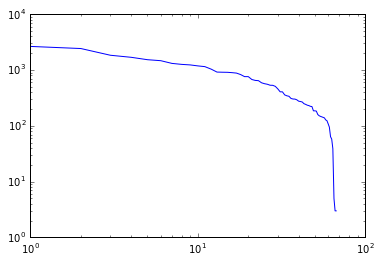

[('じ', 2654), ('し', 2432), ('さ', 1844), ('こ', 1693), ('が', 1534), ('く', 1473), ('と', 1317), ('か', 1265), ('ち', 1237), ('の', 1188), ('い', 1153), ('き', 1040), ('ど', 921), ('せ', 915), ('だ', 912), ('な', 899), ('り', 883), ('た', 831), ('ま', 763), ('よ', 763), ('ざ', 678), ('お', 653), ('え', 646), ('ほ', 592), ('つ', 570), ('は', 557), ('み', 535), ('や', 533), ('ば', 511), ('ご', 461), ('ぞ', 408), ('で', 407), ('も', 359), ('れ', 346), ('す', 339), ('づ', 310), ('ろ', 303), ('ひ', 302), ('ず', 293), ('け', 277), ('ふ', 273), ('ぶ', 268), ('そ', 250), ('あ', 243), ('う', 235), ('わ', 231), ('ぐ', 224), ('ぼ', 222), ('ぎ', 186), ('む', 186), ('ゆ', 184), ('げ', 160), ('ね', 152), ('ぜ', 148), ('ら', 145), ('に', 142), ('て', 139), ('へ', 128), ('め', 124), ('び', 109), ('べ', 95), ('ぬ', 64), ('る', 58), ('ぢ', 39), ('っ', 5), ('・', 3), ('ぴ', 3)]


In [195]:
temp = sorted(previousPronunciationEndCurrentPronunciationStart['い'].items(), key=lambda kv: kv[1], reverse=True)
### Does this follow Zipf's Law?
# CHANGE FOR GLOBAL maybe for first names

y = []
i = 1
x = []
for _,a in temp:
    x.append(i)
    i = i + 1
    y.append(a)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

print(sorted(previousPronunciationEndCurrentPronunciationStart['い'].items(), key=lambda kv: kv[1], reverse=True))
# dictionaries for each vector
# value = d.get(key, "empty")
#
# prev_pron, prev_char, all_kanji, reading (kanji: on[1], kun[0]), kanji_pron (kanji: prons), POS?, radicals?,
# singlechar?, 
# check for mixed reading

In [196]:
#allKanjiCurrentPronunciation['人']
currentKanjiOneChar#[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())

{'葛': {False: {'かつ': 42, 'くず': 258, 'つづら': 18}, True: {'くず': 2}},
 '眉': {False: {'び': 16, 'み': 7}},
 '曉': {False: {'きょう': 2, 'ぎょう': 3, 'さとる': 3}},
 '剛': {False: {'ごう': 160}},
 '陰': {False: {'いん': 44, 'かげ': 78}, True: {'かげ': 3}},
 '漑': {False: {'がい': 5}},
 '卯': {False: {'う': 438, 'ぼう': 10}, True: {'ぼう': 3}},
 '衷': {False: {'ちゅう': 3}},
 '創': {False: {'そう': 36}},
 '虐': {False: {'ぎゃく': 5}},
 '誓': {False: {'せい': 41, 'ちか': 3}},
 '床': {False: {'しょう': 2, 'とこ': 81, 'どこ': 32, 'ゆか': 15}},
 '澱': {False: {'でん': 3}},
 '潔': {False: {'けつ': 5}, True: {'けつ': 2}},
 '順': {False: {'じゅん': 198}},
 '刈': {False: {'かい': 5, 'かる': 27}},
 '宥': {False: {'ゆう': 5, 'ゆる': 2}},
 '燃': {False: {'ねん': 11}},
 '笠': {False: {'かさ': 672, 'がさ': 164, 'りゅう': 40}, True: {'りゅう': 2}},
 'ろ': {False: {'ろ': 203}},
 'ぜ': {False: {'ぜ': 12}},
 '永': {False: {'えい': 685, 'なが': 1588}, True: {'ながい': 2}},
 '玖': {False: {'きゅう': 11, 'く': 1193, 'ぐ': 3}},
 '請': {False: {'ご': 3, 'じょう': 3, 'せい': 3}},
 '網': {False: {'あみ': 40, 'もう': 8}},
 '表': {False: {

In [80]:
def getProbabilities(kanji=None,prevPron=None,prevChar=None,nextPron=None,nextChar=None,allKanji=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    dictionary_list = []
    keys = set(currentPronunciation.get(kanji, dict()).keys())
    dictionary_list.append(occurencesToPercentages(currentPronunciation.get(kanji, dict())))
    argument_list = []
    if prevPron != None:
        argument_list.append(prevPron)
        keys = keys | set(currentPronunciationPreviousPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousPronunciation.get(kanji, dict())))
    if prevChar != None:
        argument_list.append(prevChar)
        keys = keys | set(currentPronunciationPreviousCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousCharacter.get(kanji, dict())))
    if nextPron != None:
        argument_list.append(nextPron)
        keys = keys | set(currentPronunciationNextPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextPronunciation.get(kanji, dict())))
    if nextChar != None:
        argument_list.append(nextChar)
        keys = keys | set(currentPronunciationNextCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextCharacter.get(kanji, dict())))
    if allKanji != None:
        argument_list.append(allKanji)
        keys = keys | set(currentPronunciationAllKanji.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationAllKanji.get(kanji, dict())))
    return bayesTheorem(dictionary_list, keys, argument_list)

In [81]:
def bayesTheorem(dictionary_list, keys, argument_list): #kanji
    """Inputs: dictionary_list, keys, argument_list
Outputs: Sorted list of probabilities
This function follows the Bayesian Theorem that as defined
in the following paper https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
Basic formula:
P(pronunciation|feature1, feature2, ...) =
P(pronunciation)*P(feature1|pronunciation)*P(feature2|pronunciation)* ...
Arguments is synonymous with features in this example
"""
    #print(dictionary_list)
    return_dict = dict()
    for key in keys:
        return_dict[key] = return_dict.get(key, 0) + dictionary_list[0].get(key, 0)
        for i in range(len(argument_list)):
            return_dict[key] = dictionary_list[i + 1].get(key, dict()).get(argument_list[i], 0) * return_dict[key]
    return_dict = occurencesToPercentages(return_dict)
    return sorted(return_dict.items(), key=lambda kv: kv[1], reverse=True)

In [82]:
def occurencesToPercentagesArg(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    
    #for (_, value) in dict_of_occurences.items():
    #    sum = 0
    #    for (_, v) in value.items():
    #        sum += v
    sum_dict = dict()
    for (key1, value1) in dict_of_occurences.items(): 
        sum = 0
        for (key2, value2) in value1.items():
            sum = sum + value2
        sum_dict[key1] = sum_dict.get(key1, dict())
        sum_dict[key1]['sum'] = sum
        for (key2, value2) in value1.items():
            if sum_dict[key1]['sum'] != 0:
                dict_of_occurences[key1][key2] = value2 / sum_dict[key1]['sum']
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [83]:
def occurencesToPercentages(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    sum = 0
    for (_, value) in dict_of_occurences.items(): sum += value
    if sum != 0:
        for (key, value) in dict_of_occurences.items():
            dict_of_occurences[key] = value / sum
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [191]:
boys

,rank,name,pronunciation,frequency
0,1,大翔,ひろと,36
1,1,大翔,やまと,5
2,1,大翔,はると,4
3,1,大翔,まさと,3
4,1,大翔,たいが,2
5,1,大翔,つばさ,2
6,1,大翔,たいし,1
7,1,大翔,だいと,1
8,2,蓮,れん,52
9,3,悠真,ゆうま,39


In [84]:
def BayesTest(dataframe):
    name_kanji = dataframe.name.values
    name_prons = dataframe.pronunciation.values
    correct = 0
    incorrect = 0
    for pron in name_prons:
        i = 0
        for name in name_kanji:
            for kanji in name:
                estimatedPronunciation = getProbabilities(kanji)
                if len(estimatedPronunciation) > 0: # also check to ensure only kanji (hiragana/katakana are skipped)
                    if estimatedPronunciation[0][0] in pron:
                        correct += 1
                    else:
                        incorrect += 1

    total = correct + incorrect
    print('Correct count:', correct, correct/total)
    print('Incorrect count:', incorrect, incorrect/total)
    print('Total count:', total)

In [48]:
temp = propernouns[propernouns['type'] == 'place name'].sample(n=500)
BayesTest(temp)

Correct count: 44467 0.056935979513444306
Incorrect count: 736533 0.9430640204865557
Total count: 781000


In [50]:
temp = vocab.sample(n=500)
BayesTest(temp)
# similar percentage to vocab, so I must just have a bad algorithm/data
# run propernouns through phoneme/grapheme parser thing

Correct count: 34288 0.04749030470914128
Incorrect count: 687712 0.9525096952908587
Total count: 722000


In [44]:
#getProbabilities('美')
BayesTest(boys)

Correct count: 90 0.051457975986277875
Incorrect count: 1659 0.9485420240137221
Total count: 1749


In [85]:
def globalBayesTheorem(startDict, endDict, startKeys, endKeys, startArg, endArg):
    """Inputs: dictionary_list, keys, argument_list
Outputs: Sorted list of probabilities
This function follows the Bayesian Theorem that as defined
in the following paper https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
Basic formula:
P(pronunciation|feature1, feature2, ...) =
P(pronunciation)*P(feature1|pronunciation)*P(feature2|pronunciation)* ...
Arguments is synonymous with features in this example
"""
    startReturnDict = dict()
    endReturnDict = dict()
    for key in startKeys:
        for i in range(len(startArg)):
            if i == 0:
                startReturnDict[key] = startDict[0].get(key, 0)
            else:
                startReturnDict[key] = startDict[i].get(key, 0) * startReturnDict.get(key, 0)
    for key in endKeys:
        for i in range(len(endArg)):
            if i == 0:
                endReturnDict[key] = endDict[0].get(key, 0)
            else:
                endReturnDict[key] = endDict[i].get(key, 0) * endReturnDict.get(key, 0)
    startReturnDict = occurencesToPercentages(startReturnDict)
    endReturnDict = occurencesToPercentages(endReturnDict)
    return [sorted(startReturnDict.items(), key=lambda kv: kv[1], reverse=True), sorted(endReturnDict.items(), key=lambda kv: kv[1], reverse=True)]
    # Maybe also return the actual pronunciations that the Kanji can be and the probabilities for each.
    # How do I fix sparseness? Should I get global data from NHK Easy News?

In [86]:
def getGlobalProbabilities(kanji=None,pronsKnown=False,prevPron=None,prevChar=None,nextPron=None,nextChar=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    
    startDictionaryList = []
    endDictionaryList = []
    startKeys = set()
    endKeys = set()
    startArgumentList = []
    endArgumentList = []
    if pronsKnown:
        startDictionaryList.append(occurencesToPercentages(currentPronunciationStart.get(kanji, dict())))
        startKeys = set(currentPronunciationStart.get(kanji, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(currentPronunciationEnd.get(kanji, dict())))
        endKeys = set(currentPronunciationEnd.get(kanji, dict()).keys())
        startArgumentList.append(pronsKnown)
        endArgumentList.append(pronsKnown)
    if prevPron != None:
        startArgumentList.append(prevPron)
        startKeys = startKeys | set(previousPronunciationEndCurrentPronunciationStart.get(prevPron, dict()).keys())
        startDictionaryList.append(occurencesToPercentages(previousPronunciationEndCurrentPronunciationStart.get(prevPron, dict())))
    if prevChar != None:
        startArgumentList.append(prevChar)
        startKeys = startKeys | set(previousCharacterCurrentPronunciationStart.get(prevChar, dict()).keys())
        startDictionaryList.append(occurencesToPercentages(previousCharacterCurrentPronunciationStart.get(prevChar, dict())))
    if nextPron != None:
        endArgumentList.append(nextPron)
        endKeys = endKeys | set(nextPronunciationStartCurrentPronunciationEnd.get(nextPron, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(nextPronunciationStartCurrentPronunciationEnd.get(nextPron, dict())))
    if nextChar != None:
        endArgumentList.append(nextChar)
        endKeys = endKeys | set(nextCharacterCurrentPronunciationEnd.get(nextChar, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(nextCharacterCurrentPronunciationEnd.get(nextChar, dict())))
    return globalBayesTheorem(startDictionaryList, endDictionaryList, startKeys, endKeys, startArgumentList, endArgumentList)

In [165]:
getGlobalProbabilities('言', pronsKnown=True, nextPron='う')

[[('こ', 0.7894736842105263),
  ('げ', 0.10526315789473684),
  ('ご', 0.07894736842105263),
  ('い', 0.02631578947368421)],
 [('ん', 0.6872229997667366),
  ('と', 0.22766503382318637),
  ('う', 0.04682761838115231),
  ('い', 0.03828434802892466),
  ('ま', 0.0),
  ('け', 0.0),
  ('な', 0.0),
  ('や', 0.0),
  ('ゅ', 0.0),
  ('ち', 0.0),
  ('で', 0.0),
  ('に', 0.0),
  ('あ', 0.0),
  ('ね', 0.0),
  ('ぞ', 0.0),
  ('は', 0.0),
  ('げ', 0.0),
  ('た', 0.0),
  ('ぎ', 0.0),
  ('み', 0.0),
  ('ひ', 0.0),
  ('り', 0.0),
  ('ぼ', 0.0),
  ('ぢ', 0.0),
  ('お', 0.0),
  ('ぶ', 0.0),
  ('る', 0.0),
  ('れ', 0.0),
  ('べ', 0.0),
  ('ら', 0.0),
  ('ふ', 0.0),
  ('じ', 0.0),
  ('ぐ', 0.0),
  ('ほ', 0.0),
  ('よ', 0.0),
  ('す', 0.0),
  ('く', 0.0),
  ('ゆ', 0.0),
  ('か', 0.0),
  ('も', 0.0),
  ('さ', 0.0),
  ('し', 0.0),
  ('の', 0.0),
  ('つ', 0.0),
  ('ぽ', 0.0),
  ('え', 0.0),
  ('ぬ', 0.0),
  ('ば', 0.0),
  ('せ', 0.0),
  ('わ', 0.0),
  ('づ', 0.0),
  ('ど', 0.0),
  ('が', 0.0),
  ('ざ', 0.0),
  ('き', 0.0),
  ('だ', 0.0),
  ('び', 0.0),
  ('ろ', 0.0),
  ('ず

In [93]:
#源紀
#getGlobalProbabilities('源', pronsKnown=True, prevChar='START')
getGlobalProbabilities('子', pronsKnown=True)

[[('こ', 0.8850700525394045),
  ('し', 0.06786339754816112),
  ('じ', 0.017294220665499124),
  ('ご', 0.015542907180385288),
  ('ね', 0.008756567425569177),
  ('す', 0.004816112084063047),
  ('ず', 0.0006567425569176883)],
 [('こ', 0.8850700525394045),
  ('し', 0.06786339754816112),
  ('じ', 0.017294220665499124),
  ('ご', 0.015542907180385288),
  ('ね', 0.008756567425569177),
  ('す', 0.004816112084063047),
  ('ず', 0.0006567425569176883)]]

In [128]:
getGlobalProbabilities('日', pronsKnown=True, nextChar='曜')

[[('ひ', 0.2631578947368421),
  ('に', 0.22807017543859648),
  ('び', 0.21052631578947367),
  ('か', 0.15789473684210525),
  ('じ', 0.14035087719298245)],
 [('ち', 0.43333333333333335),
  ('か', 0.3),
  ('つ', 0.26666666666666666),
  ('び', 0.0),
  ('い', 0.0),
  ('ど', 0.0),
  ('ん', 0.0),
  ('ひ', 0.0),
  ('く', 0.0)]]

In [170]:
getGlobalProbabilities('日', pronsKnown=False, prevChar='曜')

[[('こ', 1.0)], []]

In [53]:
createBayes()

In [98]:
nextCharacterCurrentPronunciationEnd['で']

{'い': 2, 'な': 1, 'ま': 2, 'め': 1, 'ゆ': 1, 'り': 1, 'る': 1, 'ろ': 1, 'ん': 2}

In [73]:
nextPronunciationStartCurrentPronunciationEnd['で']

{'い': 3,
 'え': 1,
 'し': 2,
 'な': 1,
 'の': 1,
 'は': 1,
 'ま': 2,
 'め': 2,
 'ゆ': 1,
 'り': 1,
 'る': 1,
 'ろ': 1,
 'ん': 2}

In [ ]:
getP

In [ ]:
### WHY ALLKANJI MATTERS: 微笑み hoho e mi　微笑 bi shou

In [ ]:
### take all regular and[?] irregular words and push the pronunciations through globalPreviousPronunciation
### and globalNextPronunciation while holding small characters to the previous syllable